# COMP 472 Mini-Project 1

## 1. Dataset Preparation & Analysis 

### 1.2. Load dataset

In [50]:
import gzip
import json
with gzip.open('goemotions.json.gz', 'rb') as f:
    data = json.loads(f.read())

In [51]:
comments = []
emotions = []
sentiments = []

for comment in data:
    comments.append(comment[0])
    emotions.append(comment[1])
    sentiments.append(comment[2])

In [52]:
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

### 1.3. Data analysis

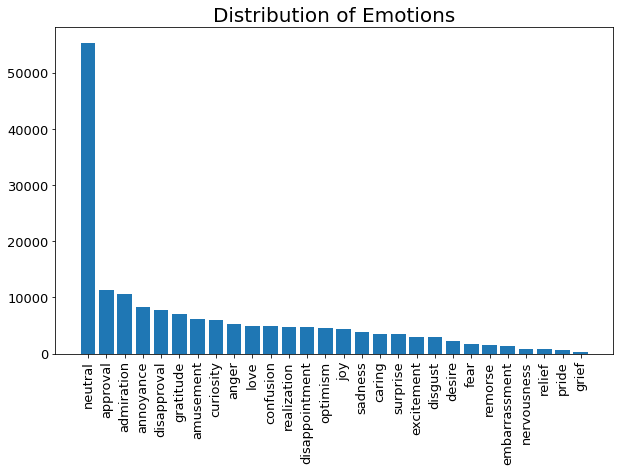

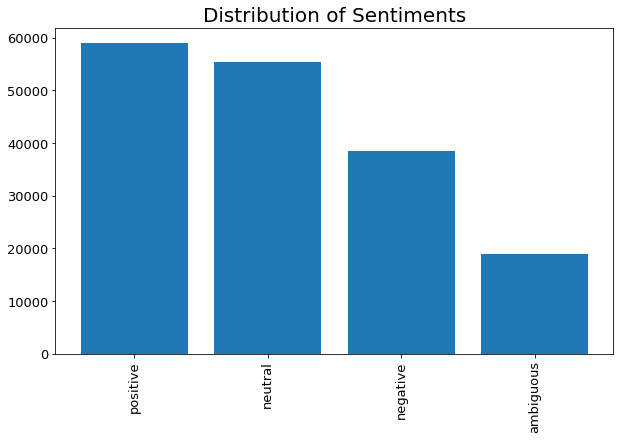

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#dictionary of emotions and frequency count
emotions_count = Counter(emotions)

#tuple of emotion labels, tuple of emotion frequency counts
emotions_labels, emotions_count_values = zip(*emotions_count.items())

#list of emotions_count_values indexes sorted by emotions_count_values in descending order (indexes that would sort in descending order)
emotion_values_indexes_in_desc_order = np.argsort(emotions_count_values)[::-1]

emotions_labels = np.array(emotions_labels)[emotion_values_indexes_in_desc_order]
emotions_count_values = np.array(emotions_count_values)[emotion_values_indexes_in_desc_order]
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=13)
plt.title("Distribution of Emotions", fontsize=20)
plt.xticks(rotation=90)
plt.bar(emotions_labels, emotions_count_values)
plt.show()

#dictionary of sentiments and frequency count
sentiments_count = Counter(sentiments)

#tuple of sentiment labels, tuple of sentiment frequency counts
sentiment_labels, sentiment_count_values = zip(*sentiments_count.items())

#list of sentiment_count_values indexes sorted by sentiment_count_values in descending order (indexes that would sort in descending order)
sentiment_values_indexes_in_desc_order = np.argsort(sentiment_count_values)[::-1]

sentiment_labels = np.array(sentiment_labels)[sentiment_values_indexes_in_desc_order]
sentiment_count_values = np.array(sentiment_count_values)[sentiment_values_indexes_in_desc_order]

plt.figure(figsize=(10,6))
plt.tick_params(labelsize=13)
plt.title("Distribution of Sentiments", fontsize=20)
plt.xticks(rotation=90)
plt.bar(sentiment_labels, sentiment_count_values)
plt.show()


## 2. Words as Features

### 2.1. Dataset preprocessing

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
#extract tokens/words and their frequency
X = vectorizer.fit_transform(comments)

#comments emotion classification
y_emotions = np.array(emotions)
#comments sentiment classification
y_sentiments = np.array(sentiments)
print("Number of tokens in dataset:", len(vectorizer.get_feature_names()))

Number of tokens in dataset: 30449


### 2.2. Dataset split

In [55]:
from sklearn.model_selection import train_test_split

#split dataset for emotions classification
X_train_emotions, X_test_emotions, y_train_emotions, y_test_emotions = train_test_split(X,y_emotions, test_size=0.2)

#split dataset for sentiments classification
X_train_sentiments, X_test_sentiments, y_train_sentiments, y_test_sentiments = train_test_split(X,y_sentiments, test_size=0.2)


### 2.3 
#### Train and test the following classifiers, for both the emotion and the sentiment classification, using word frequency as features.


In [56]:
#function to write confusion matrix, precision, recall and f1-measure to text file.
from sklearn import metrics
from sklearn.metrics import classification_report

def classification_performance(model_prediction, y_test, model_name, hyper_parameters):
    np.set_printoptions(linewidth=np.inf)
    conf_matrix = np.array2string(metrics.confusion_matrix(y_test, model_prediction))
    class_report = classification_report(y_test, model_prediction, zero_division=0)
    print(model_name + " with " + hyper_parameters + ":\n")
    print("\nConfusion Matrix:\n" + conf_matrix + "\n")
    print("\nClassification Report:\n" + class_report + "\n")
    
    with open("performance.txt", "a") as file:
        file.write(model_name + " with " + hyper_parameters + ":\n")
        file.write("\nConfusion Matrix:\n" + conf_matrix + "\n")
        file.write("\nClassification Report:\n" + class_report + "\n")

### 2.3.1. Base-MNB

In [57]:
# Default Parameter Multinomial Naive Bayes Classifier for both emotions and sentiments.

from sklearn.naive_bayes import MultinomialNB

mnb_classifier_emotions = MultinomialNB()
#train MNB emotions model
mnb_model_emotions = mnb_classifier_emotions.fit(X_train_emotions, y_train_emotions)
#test MNB emotions model
mnb_predict_emotions = mnb_model_emotions.predict(X_test_emotions)

mnb_classifier_sentiments = MultinomialNB()
#train MNB sentiments model
mnb_model_sentiments = mnb_classifier_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MNB sentiments model
mnb_predict_sentiments = mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mnb_predict_emotions, y_test_emotions, "Base-MNB emotions", "default parameters")
classification_performance(mnb_predict_sentiments, y_test_sentiments, "Base-MNB sentiments", "default parameters")

Base-MNB emotions with default parameters:


Confusion Matrix:
[[ 923   15    2    5   49    1    0    7    0    3    5    1    0    5    0   40    0   18   51    0  891   15    0    3    0    0    2   12]
 [  51  355    5   18   17    0    1    3    0    1    8    0    0    2    0    7    0   12    5    0  783    5    0    1    0    0    1    4]
 [   8    5  110   67    8    3    1    5    0    3   14    5    0    4    1    4    0    0    2    0  755    3    0    1    0    1    0    3]
 [  26   17   43  120   29    4    6   11    0    8   29   11    0    2    0   10    0    4    4    0 1301    1    0    7    0    1    4    6]
 [ 105   15    6   29  229    8    9   10    3    4   30    0    0    3    0   16    0    6   17    0 1776   11    0    6    0    0    7    1]
 [  19    4    2    4   14   42    4    1    0    1    6    0    0    1    0   16    0    5    2    0  580   13    0    1    0    0    4    1]
 [  12   10    1   13   23    1   54   41    0    2   12    0    0    0    1   

### 2.3.2. Base-DT

In [58]:
# Default Parameter Decision Tree Classifier for both emotions and sentiments.

from sklearn import tree

dtc_emotions = tree.DecisionTreeClassifier()
#train DTC emotions model
dtc_model_emotions = dtc_emotions.fit(X_train_emotions, y_train_emotions)
#test DTC emotions model
dtc_predict_emotions = dtc_model_emotions.predict(X_test_emotions)

dtc_sentiments = tree.DecisionTreeClassifier()
#train DTC sentiments model
dtc_model_sentiments = dtc_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test DTC sentiments model
dtc_predict_sentiments = dtc_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(dtc_predict_emotions, y_test_emotions, "Base-DT emotions", "default parameters")
classification_performance(dtc_predict_sentiments, y_test_sentiments, "Base-DT sentiments", "default parameters")

Base-DT emotions with default parameters:


Confusion Matrix:
[[1152   42   15   32  127   18   13   22   11   13   11    5    4   44    6   58    1   57   78    3  255   30   12    9    4    2    2   22]
 [  70  725   15   52   38    9   22   14    9   10   18    6    3   17    2   11    1   57    9    0  168    6    0    5    1    2    1    8]
 [  20   26  354  158   33    8   16   16    5   23   44   33    7    7    3    3    2    3    5    2  209    4    0    4    1    4    5    8]
 [  54   64  222  386  105   32   36   40   11   76  112   41   16   12   11   10    2    9   19    6  334    8    0   13    0    4   15    6]
 [ 207   58   56  142  612   73   39   40   33   46   76   16   14   35   10   16    0   35   35    4  642   32    1   38    5    4    8   14]
 [  37   11   25   41   87  173   10    5   15   11   24    1    1    6    4   13    0   18   10    6  170   19    3    5    4    8   12    1]
 [  18   24   25   67   63    9  283  126    1   21   33    6    5    1    5    

### 2.3.3. Base-MLP

In [59]:
# Default Parameter Perceptron Classifier for both emotions and sentiments.

from sklearn.neural_network import MLPClassifier

mlp_emotions = MLPClassifier(max_iter=1)
#train MLP emotions model
mlp_model_emotions = mlp_emotions.fit(X_train_emotions, y_train_emotions)
#test MLP emotions model
mlp_predict_emotions = mlp_model_emotions.predict(X_test_emotions)

mlp_sentiments = MLPClassifier(max_iter=1)
#train MLP sentiments model
mlp_model_sentiments = mlp_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MLP sentiments model
mlp_predict_sentiments = mlp_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mlp_predict_emotions, y_test_emotions, "Base-MLP emotions", "default parameters")
classification_performance(mlp_predict_sentiments, y_test_sentiments, "Base-MLP sentiments", "default parameters")

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions with default parameters:


Confusion Matrix:
[[1038   26    7    1   14    1    2    1    4    1    3    4    0    3    4   36    0   44   79    0  733   16    0    0    0    0    0   31]
 [  43  729    8    9    6    0    1    2    3    0    1    1    0    1    1    5    0   30    9    0  404    7    0    0    0    1    1   17]
 [  10    9  222   35    4    0    3    2    0    1    8   16    0    0    2    3    0    3    8    0  658    6    0    1    0    5    1    6]
 [  26   40   88   60   10    1    4    6    5    4   15   21    0    1    5   11    0    8   16    0 1290    3    0    2    0    8   10   10]
 [ 125   36   15    6  140   12    4    4    5    1   10    6    1    2    3    9    0   21   32    0 1809   19    0    7    0    4    9   11]
 [  23   12    5    5    5   43    2    2    8    0    6    1    0    1    4    7    0   17    9    0  523   22    0    1    0   16    6    2]
 [  11   18   10    3    7    1   71   19    0    0    8    1    0    0    3   

### 2.3.4. Top-MNB

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

search_space_MNB = {
    "alpha" : [0, 0.5, 1.5, 2.0]
}

gs_mnb_emotions = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB emotions model
gs_mnb_model_emotions = gs_mnb_emotions.fit(X_train_emotions, y_train_emotions)
#test GS MNB emotions model
gs_mnb_predict_emotions = gs_mnb_model_emotions.predict(X_test_emotions)


gs_mnb_sentiments = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB sentiments model
gs_mnb_model_sentiments = gs_mnb_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS MNB sentiments model
gs_mnb_predict_sentiments = gs_mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_mnb_predict_emotions, y_test_emotions, "Top-MNB emotions", "alpha : [0, 0.5, 4, 5]")
classification_performance(gs_mnb_predict_sentiments, y_test_sentiments, "Top-MNB sentiments", "alpha : [0, 0.5, 4, 5]")

C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in n

Top-MNB emotions with alpha : [0, 0.5, 4, 5]:


Confusion Matrix:
[[1039   27    6   12   62    9    6   11    0    8   10    1    0   10    2   52    0   30   80    0  623   27    0    6    0    0    2   25]
 [  62  548   11   29   28    3    5    9    1    2    7    6    1    3    0    7    0   22    9    0  503    7    0    3    0    0    3   10]
 [  13   12  184  105   17    9    4   10    0   17   26   16    1    4    1    6    0    1    5    0  550    8    1    6    0    1    0    6]
 [  37   35   81  174   48   13   13   22    4   26   64   26    2    5    1   12    0    8   10    1 1010    4    0   16    0    2   17   13]
 [ 126   30   19   46  311   31   20   17    8   15   60    3    0    9    6   25    0   14   35    0 1438   29    0   24    0    1   17    7]
 [  23    7    2    7   20  106    4    3    1    9   11    0    1    3    0   22    0   10    3    0  450   24    0    1    0    5    7    1]
 [  15   17    5   24   23    3  118   67    1    3   24    2    0    1    4

### 2.3.5. Top-DT

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

search_space_DT = {
    "criterion" : np.array(["entropy"]),
    "max_depth" : np.array([10, 11]),
    "min_samples_split" : np.array([5, 10, 15])
}

gs_dt_emotions = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT emotions model
gs_dt_model_emotions = gs_dt_emotions.fit(X_train_emotions, y_train_emotions)
#test GS DT emotions model
gs_dt_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

gs_dt_sentiments = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT model sentiments
gs_dt_model_sentiments = gs_dt_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS DT model sentiments
gs_dt_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_dt_predict_emotions, y_test_emotions, "Top-DT emotions", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")
classification_performance(gs_dt_predict_sentiments, y_test_sentiments, "Top-DT sentiments", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")

Top-DT emotions with criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15:


Confusion Matrix:
[[  437    14     0     0     1     0     0     0     3     0     0     0     0     2     0    15     0    43    75     0  1439    19     0     0     0     0     0     0]
 [   24   435     1     2     0     0     1     0     4     0     0     1     0     1     0     3     0     5    11     0   786     4     0     0     0     0     1     0]
 [   14     5     1     0     0     0     0     0     0     0     1     0     0     0     0     3     0     5     6     0   957     6     0     0     0     5     0     0]
 [   19    23     1     2     0     0     0     0     5     1     2     0     0     0     0    10     0     5    18     0  1546     3     0     0     0     9     0     0]
 [  105    15     0     0     0     1     0     1     3     0     0     0     0     0     0     6     0    12    29     0  2096    19     0     0     0     4     0     0]
 [   29     6     1     0     0     0     

### 2.3.6. Top-MLP (3pts)

In [62]:
#Top-MLP
search_space_Top_MLP = {
    'activation' : np.array(['identity', 'logistic', 'tanh', 'relu']),
    'hidden_layer_sizes' : [(30, 50), (10, 10, 10)],
    'solver' : ['adam', 'sgd']
}

gs_mlp_model_emotions = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

# Emotions:
#train GS MLP emotions model
gs_mlp_model_emotions.fit(X_train_emotions, y_train_emotions)

#test GS MLP emotions model
gs_mlp_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

# Sentiments:
gs_mlp_model_sentiments = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

#train GS MLP emotions model
gs_mlp_model_sentiments.fit(X_train_sentiments, y_train_sentiments)

#test GS MLP emotions model
gs_mlp_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

classification_performance(gs_mlp_predict_emotions, y_test_emotions, "Top-MLP emotions", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")
classification_performance(gs_mlp_predict_sentiments, y_test_sentiments, "Top-MLP sentiments", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")


C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

Top-MLP emotions with activation: sigmoid, tanh, relu, identity, solver: adam and sgd:


Confusion Matrix:
[[  437    14     0     0     1     0     0     0     3     0     0     0     0     2     0    15     0    43    75     0  1439    19     0     0     0     0     0     0]
 [   24   435     1     2     0     0     1     0     4     0     0     1     0     1     0     3     0     5    11     0   786     4     0     0     0     0     1     0]
 [   14     5     1     0     0     0     0     0     0     0     1     0     0     0     0     3     0     5     6     0   957     6     0     0     0     5     0     0]
 [   19    23     1     2     0     0     0     0     5     1     2     0     0     0     0    10     0     5    18     0  1546     3     0     0     0     9     0     0]
 [  105    15     0     0     0     1     0     1     3     0     0     0     0     0     0     6     0    12    29     0  2096    19     0     0     0     4     0     0]
 [   29     6     1     0     0     0 

### 2.4 (5pts)
#### In each part of 2.3

### 2.5 (7.5pts)

In [63]:
#split dataset for emotions classification
X_train_emotions, X_test_emotions, y_train_emotions, y_test_emotions = train_test_split(X,y_emotions, test_size=0.7)

#split dataset for sentiments classification
X_train_sentiments, X_test_sentiments, y_train_sentiments, y_test_sentiments = train_test_split(X,y_sentiments, test_size=0.7)


### 2.5.1 Base-MNB

In [64]:
# Default Parameter Multinomial Naive Bayes Classifier for both emotions and sentiments.

# Emotions:
mnb_classifier_emotions = MultinomialNB()
#train MNB emotions model
mnb_model_emotions = mnb_classifier_emotions.fit(X_train_emotions, y_train_emotions)
#test MNB emotions model
mnb_predict_emotions = mnb_model_emotions.predict(X_test_emotions)

# Sentiments
mnb_classifier_sentiments = MultinomialNB()
#train MNB sentiments model
mnb_model_sentiments = mnb_classifier_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MNB sentiments model
mnb_predict_sentiments = mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mnb_predict_emotions, y_test_emotions, "Base-MNB emotions", "default parameters")
classification_performance(mnb_predict_sentiments, y_test_sentiments, "Base-MNB sentiments", "default parameters")

Base-MNB emotions with default parameters:


Confusion Matrix:
[[ 1942    18     2    14    54     1     0     5     0     5     6     1     0     2     0    67     0    21    40     0  5140     1     0     0     0     0     0     1]
 [   72   417     3    20    15     0     2     1     0     3     4     0     0     2     0    17     0    15     6     0  3774     1     0     1     0     0     1     2]
 [   21    11   138    91    15     1     1     4     0     1    11     3     0     0     0    13     0     1     3     0  3297     3     0     3     0     0     2     0]
 [   31    17    49   100    40     2     2     4     0     4    24    10     0     2     0    15     0     5     3     0  5541     0     0     3     0     0     2     2]
 [  185    20     3    18   239     3     7    10     0     2    34     1     0     2     0    20     0     2    12     0  7376     9     0     2     0     1     3     0]
 [   32     0     1     3    13    18     0     0     0     0     6     0     0   

### 2.5.2 Base-DT

In [65]:
# Default Parameter Decision Tree Classifier for both emotions and sentiments.

# Emotions:
dtc_emotions = tree.DecisionTreeClassifier()
#train DTC emotions model
dtc_model_emotions = dtc_emotions.fit(X_train_emotions, y_train_emotions)
#test DTC emotions model
dtc_predict_emotions = dtc_model_emotions.predict(X_test_emotions)

# Sentiments:
dtc_sentiments = tree.DecisionTreeClassifier()
#train DTC sentiments model
dtc_model_sentiments = dtc_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test DTC sentiments model
dtc_predict_sentiments = dtc_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(dtc_predict_emotions, y_test_emotions, "Base-DT emotions", "default parameters")
classification_performance(dtc_predict_sentiments, y_test_sentiments, "Base-DT sentiments", "default parameters")

Base-DT emotions with default parameters:


Confusion Matrix:
[[ 3293   152    75   127   428    77    84    86    54    82   122    30    12   212    10   197     3   187   331     7  1371   134    29    66    25     8    24    94]
 [  180  2070    52   133   136    25    53    53    17    58    86    25    24    51    18    35     0   218    53     7   882    50     1    51     5     9    17    47]
 [   70    59   852   402   140    33    56    71    29    92   167   164    26    25    19    19     6    26    31    15  1159    24     4    35    12    10    31    42]
 [  157   173   517   773   355   111   144   135    38   237   346   236    59    61    53    48     6    49    71    21  1888    73     9    95    11    34    68    88]
 [  574   174   159   365  1421   183   178   164   102   182   339    85    35   107    42    90     9   138   146    26  2846   201    19   180    32    26    61    65]
 [  107    43    60   103   191   442    29    41    53    58    82    14    15    

### 2.5.3 Base-MLP

In [66]:
# Default Parameter Perceptron Classifier for both emotions and sentiments.

mlp_emotions = MLPClassifier(max_iter=1)
#train MLP emotions model
mlp_model_emotions = mlp_emotions.fit(X_train_emotions, y_train_emotions)
#test MLP emotions model
mlp_predict_emotions = mlp_model_emotions.predict(X_test_emotions)

mlp_sentiments = MLPClassifier(max_iter=1)
#train MLP sentiments model
mlp_model_sentiments = mlp_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MLP sentiments model
mlp_predict_sentiments = mlp_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mlp_predict_emotions, y_test_emotions, "Base-MLP emotions", "default parameters")
classification_performance(mlp_predict_sentiments, y_test_sentiments, "Base-MLP sentiments", "default parameters")

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions with default parameters:


Confusion Matrix:
[[ 3125    56     1     1     7     1     0     1     0     0     1     0     0     0     0    57     0    33   233     0  3778    22     0     0     0     0     0     4]
 [  131  1880     1     5     3     0     0     1     0     0     4     0     0     0     0    25     0    15    41     0  2245     5     0     0     0     0     0     0]
 [   61    30    65    33     1     1     0     0     0     0    17     5     0     0     0    17     0     2    22     0  3354     8     0     0     0     2     1     0]
 [  121    92    19    29    11     2     0     0     0     1    24     2     0     0     0    44     0     3    46     0  5451     7     0     0     0     4     0     0]
 [  423    87     0     9    81     0     1     3     0     0    10     1     0     0     0    31     0     9    99     0  7154    38     0     0     0     3     0     0]
 [  129    13     1     2     5     6     0     0     0     0     7     0     0   

### 2.5.4 Top-MNB

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

search_space_MNB = {
    "alpha" : [0, 0.5, 1.5, 2.0]
}

gs_mnb_emotions = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB emotions model
gs_mnb_model_emotions = gs_mnb_emotions.fit(X_train_emotions, y_train_emotions)
#test GS MNB emotions model
gs_mnb_predict_emotions = gs_mnb_model_emotions.predict(X_test_emotions)


gs_mnb_sentiments = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB sentiments model
gs_mnb_model_sentiments = gs_mnb_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS MNB sentiments model
gs_mnb_predict_sentiments = gs_mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_mnb_predict_emotions, y_test_emotions, "Top-MNB emotions", "alpha : [0, 0.5, 1.5, 2.0]")
classification_performance(gs_mnb_predict_sentiments, y_test_sentiments, "Top-MNB sentiments", "alpha : [0, 0.5, 1.5, 2.0]")

C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\linus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in n

Top-MNB emotions with alpha : [0, 0.5, 1.5, 2.0]:


Confusion Matrix:
[[ 2862    53     6    30   176     5     1    31     1     8    22     4     2     7     0   145     0    53   123     0  3724    30     0    13     0     0     2    22]
 [  129   924    12    53    52     0     5    12     3     9    31     1     0    10     1    30     0    54    13     1  2981     6     0    10     0     0     7    12]
 [   48    24   307   234    42     4     8    18     2     9    41    15     1     3     1    17     0     4     9     0  2803     6     0    12     0     0     9     2]
 [   85    57   142   291   158    14    18    28     1    22   110    32     1     9     2    32     0     9    11     0  4776     8     0    21     0     3    18     8]
 [  346    52    16    97   608    19    41    29     5    15   113     5     1     9     1    61     0    20    34     0  6363    55     0    39     0     1    11     8]
 [   48     4     7    21    50    84     2     9     0     8    12     3  

### 2.5.5 Top-DT

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

search_space_DT = {
    "criterion" : np.array(["entropy"]),
    "max_depth" : np.array([10, 11]),
    "min_samples_split" : np.array([5, 10, 15])
}

gs_dt_emotions = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT emotions model
gs_dt_model_emotions = gs_dt_emotions.fit(X_train_emotions, y_train_emotions)
#test GS DT emotions model
gs_dt_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

gs_dt_sentiments = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT model sentiments
gs_dt_model_sentiments = gs_dt_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS DT model sentiments
gs_dt_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_dt_predict_emotions, y_test_emotions, "Top-DT emotions", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")
classification_performance(gs_dt_predict_sentiments, y_test_sentiments, "Top-DT sentiments", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")

Top-DT emotions with criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15:


Confusion Matrix:
[[ 1566    42     5     3     3     1     0     1    23     0     1     0     0    17     0    46     0   120   257     0  5167    63     0     0     1     4     0     0]
 [   80  1451     0     1     1     0     5     5     8     0     2     0    10     5     0    22     0    14    53     0  2661    15     0     1     2    18     2     0]
 [   53    26     3     0     0     1     0     0     4     0     0     0     0     2     0    17     0    14    21     0  3455    12     0     0     0    11     0     0]
 [   93    82     1     8     0     2     0     2    13     0     1     0     1     1     0    37     0    27    45     0  5489    23     0     0     1    30     0     0]
 [  354    64     2     3     1     1     0     2    20     0     1     1     0     5     0    29     0    59    99     0  7219    68     0     0     1    20     0     0]
 [   97    10     0     3     0     4     

### 2.5.6 Top-MLP

In [69]:
#Top-MLP
search_space_Top_MLP = {
    'activation' : np.array(['identity', 'logistic', 'tanh', 'relu']),
    'hidden_layer_sizes' : [(30, 50), (10, 10, 10)],
    'solver' : ['adam', 'sgd']
}

gs_mlp_model_emotions = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

# Emotions:
#train GS MLP emotions model
gs_mlp_model_emotions.fit(X_train_emotions, y_train_emotions)

#test GS MLP emotions model
gs_mlp_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

# Sentiments:
gs_mlp_model_sentiments = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

#train GS MLP emotions model
gs_mlp_model_sentiments.fit(X_train_sentiments, y_train_sentiments)

#test GS MLP emotions model
gs_mlp_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

classification_performance(gs_mlp_predict_emotions, y_test_emotions, "Top-MLP emotions", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")
classification_performance(gs_mlp_predict_sentiments, y_test_sentiments, "Top-MLP sentiments", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")





C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

Top-MLP emotions with activation: sigmoid, tanh, relu, identity, solver: adam and sgd:


Confusion Matrix:
[[ 1566    42     5     3     3     1     0     1    23     0     1     0     0    17     0    46     0   120   257     0  5167    63     0     0     1     4     0     0]
 [   80  1451     0     1     1     0     5     5     8     0     2     0    10     5     0    22     0    14    53     0  2661    15     0     1     2    18     2     0]
 [   53    26     3     0     0     1     0     0     4     0     0     0     0     2     0    17     0    14    21     0  3455    12     0     0     0    11     0     0]
 [   93    82     1     8     0     2     0     2    13     0     1     0     1     1     0    37     0    27    45     0  5489    23     0     0     1    30     0     0]
 [  354    64     2     3     1     1     0     2    20     0     1     1     0     5     0    29     0    59    99     0  7219    68     0     0     1    20     0     0]
 [   97    10     0     3     0     4 

## 3. Embeddings as Features

### 3.1.

In [70]:
import gensim.downloader as api
from gensim.models import Word2Vec

wv = api.load('word2vec-google-news-300')

### 3.2.

In [71]:
# 3.2  Use the tokenizer from nltk to extract words from the Reddit posts. Display the number
# of tokens in the training set.
from nltk.tokenize import word_tokenize

def comment_tokenizer(comments):
    tokenized_comments = []

    for comment in comments:
        token_comment = word_tokenize(comment)
        tokenized_comments.append(token_comment)
    return tokenized_comments

### 3.3.

In [72]:
# 3.3 Compute the embedding of a Reddit post as the average of the embeddings of its words. If
# a word has no embedding in Word2Vec, skip it.

def embedded_comments(tokenized_comments):
    comment_embeddings = []
    hit_count = 0
    token_count = 0
    
    for comment in tokenized_comments:
        comment_token_embeddings = []
        for token in comment:
            token_count += 1
            try:
                embedded_token = wv[token]
                comment_token_embeddings.append(embedded_token)
                hit_count += 1
            except KeyError:
                pass
        if len(comment_token_embeddings) != 0: 
            tkn_embdng = np.array(comment_token_embeddings)
            comment_embeddings.append(np.mean(tkn_embdng, axis=0))
        else:
            comment_embeddings.append(np.zeros(300))
    return comment_embeddings, hit_count, token_count

In [73]:
from sklearn.model_selection import train_test_split

#split dataset for emotions classification
X_train_emotions, X_test_emotions, y_train_emotions, y_test_emotions = train_test_split(comments,y_emotions, test_size=0.2)

#split dataset for sentiments classification
X_train_sentiments, X_test_sentiments, y_train_sentiments, y_test_sentiments = train_test_split(comments,y_sentiments, test_size=0.2)


In [74]:
tokenized_X_train_emotions = comment_tokenizer(X_train_emotions)
tokenized_X_test_emotions = comment_tokenizer(X_test_emotions)
tokenized_X_train_sentiments = comment_tokenizer(X_train_sentiments)
tokenized_X_test_sentiments = comment_tokenizer(X_test_sentiments)

In [75]:
X_train_emotions_embeddings, X_train_emotions_hit_count, X_train_emotions_token_count = embedded_comments(tokenized_X_train_emotions)
X_test_emotions_embeddings, X_test_emotions_hit_count, X_test_emotions_token_count = embedded_comments(tokenized_X_test_emotions)
X_train_sentiments_embeddings, X_train_sentiments_hit_count, X_train_sentiments_token_count = embedded_comments(tokenized_X_train_sentiments)
X_test_sentiments_embeddings, X_test_sentiments_hit_count, X_test_sentiments_token_count = embedded_comments(tokenized_X_test_sentiments)


### 3.4.

In [76]:
X_train_emotions_hit_rate = X_train_emotions_hit_count / X_train_emotions_token_count
print("Emotions training dataset hit rate", X_train_emotions_hit_rate)

X_test_emotions_hit_rate = X_test_emotions_hit_count / X_test_emotions_token_count
print("Emotions test dataset hit rate", X_test_emotions_hit_rate)

X_train_sentiments_hit_rate = X_train_sentiments_hit_count / X_train_sentiments_token_count
print("Sentiments test dataset hit rate", X_train_sentiments_hit_rate)

X_test_sentiments_hit_rate = X_test_sentiments_hit_count / X_test_sentiments_token_count
print("Sentiments test dataset hit rate", X_test_sentiments_hit_rate)

Emotions training dataset hit rate 0.7745297224492267
Emotions test dataset hit rate 0.7744175512609852
Sentiments test dataset hit rate 0.7744996390280849
Sentiments test dataset hit rate 0.7745381544393339


### 3.5.

In [77]:
# Default Parameter Perceptron Classifier for both emotions and sentiments.

from sklearn.neural_network import MLPClassifier

mlp_emotions = MLPClassifier()
#train MLP emotions model
mlp_model_emotions = mlp_emotions.fit(X_train_emotions_embeddings, y_train_emotions)
#test MLP emotions model
mlp_predict_emotions = mlp_model_emotions.predict(X_test_emotions_embeddings)

mlp_sentiments = MLPClassifier()
#train MLP sentiments model
mlp_model_sentiments = mlp_sentiments.fit(X_train_sentiments_embeddings, y_train_sentiments)
#test MLP sentiments model
mlp_predict_sentiments = mlp_model_sentiments.predict(X_test_sentiments_embeddings)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mlp_predict_emotions, y_test_emotions, "Base-MLP emotions with embeddings", "default parameters")
classification_performance(mlp_predict_sentiments, y_test_sentiments, "Base-MLP sentiment swith embeddings", "default parameters")

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions with embeddings with default parameters:


Confusion Matrix:
[[ 933   41    9   12   46    8    1   10    5    1    5    4    0   19    5   66    0   56  118    0  684   21    4    0    8    1    4   41]
 [  41  621    2   20   10    1    5    4    4    1    7    5    0    4    7    7    0   54   17    1  388    8    0    0    1    1    8   11]
 [   8   22  196   99    8    4    5   17    2   13   25   15    4    1   11    5    0    1   10    0  605    1    0    2    0    2    4    2]
 [  30   56   72  142   15   13   15   27    3   19   45   22    8    1   11   13    0    7   14    4 1090    9    0    3    1    7   18    6]
 [ 133   56   15   25  171   28   15   21   16    5   36    6    1    4   14   19    0   36   42    2 1519   23    0    6    9    6    8   13]
 [  19   13    2    2   13  104    1    5    4    3    3    0    0    2    7   18    0   16    7    1  461   26    0    0    1    7    9    1]
 [  12   24   10   14   11    3   86   96    1    5    7    1  

### 3.6.

In [78]:
search_space_Top_MLP_emb = {
    'activation' : np.array(['identity', 'logistic', 'tanh', 'relu']),
    'hidden_layer_sizes' : [(30, 50), (10, 10, 10)],
    'solver' : ['adam', 'sgd']
}

GS_MLP_emotions = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP_emb)
#train GS MLP emotions model
GS_MLP_model_emotions = GS_MLP_emotions.fit(X_train_emotions_embeddings, y_train_emotions)
#test GS MLP emotions model
GS_MLP_predict_emotions = GS_MLP_model_emotions.predict(X_test_emotions_embeddings)

GS_MLP_sentiments = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP_emb)
#train GS MLP sentiments model
GS_MLP_model_sentiments = GS_MLP_sentiments.fit(X_train_sentiments_embeddings, y_train_sentiments)
#test GS MLP sentiments model
GS_MLP_predict_sentiments = GS_MLP_model_sentiments.predict(X_test_sentiments_embeddings)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(GS_MLP_predict_emotions, y_test_emotions, "Top-MLP emotions with embeddings", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")
classification_performance(GS_MLP_predict_sentiments, y_test_sentiments, "Top-MLP sentiment swith embeddings", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_pe

Top-MLP emotions with embeddings with activation: sigmoid, tanh, relu, identity, solver: adam and sgd:


Confusion Matrix:
[[  834    31     3     2     1     1     0     4     0     0     0     4     0     0     0    66     0    14    64     0  1067    11     0     0     0     0     0     0]
 [   54   244     1     3     2     0     0     1     0     0     3     1     0     0     0    14     0    10     8     0   884     2     0     0     0     0     1     0]
 [   10    20    85    12     0     1     0    10     0     2     7     6     0     0     0     6     0     0    19     0   881     0     0     0     0     1     2     0]
 [   13    39    32    16     0     1     3     5     0     0     5     5     0     0     0    11     0     2    10     0  1498     2     0     0     0     0     9     0]
 [  149    35     5     5     7     3     1     1     0     0     9     4     0     0     0    34     0     2    25     0  1932    13     0     0     0     2     2     0]
 [   30     1     3   

### 3.8.